In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.arima_model import ARMAResults
from statsmodels.stats.diagnostic import acorr_ljungbox

In [2]:
df = pd.read_excel('arma_data.xlsx', header = None, usecols = [0, 2, 4])
df.columns = ['A', 'C', 'E']
df.head()

,A,C,E
0,-16.294450,7.292132,4.548761
1,-16.863490,10.249911,9.802159
2,-17.055560,9.489489,1.465493
3,-16.873407,15.896746,6.196176
4,-15.643009,12.809460,5.246250


200
1500
1000


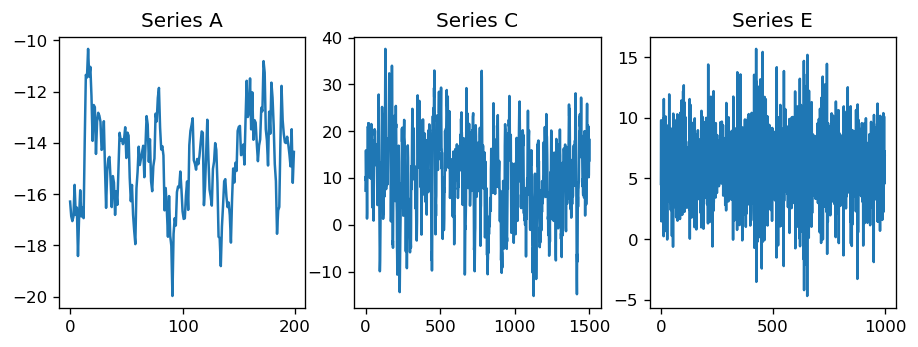

In [3]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
plt.subplot(1, 3, 1)
plt.plot(df.A)
plt.title('Series A')
plt.subplot(1, 3, 2)
plt.plot(df.C)
plt.title('Series C')
plt.subplot(1, 3, 3)
plt.plot(df.E)
plt.title('Series E')

print(len(df.A.dropna()))
print(len(df.C.dropna()))
print(len(df.E.dropna()))

# Series A

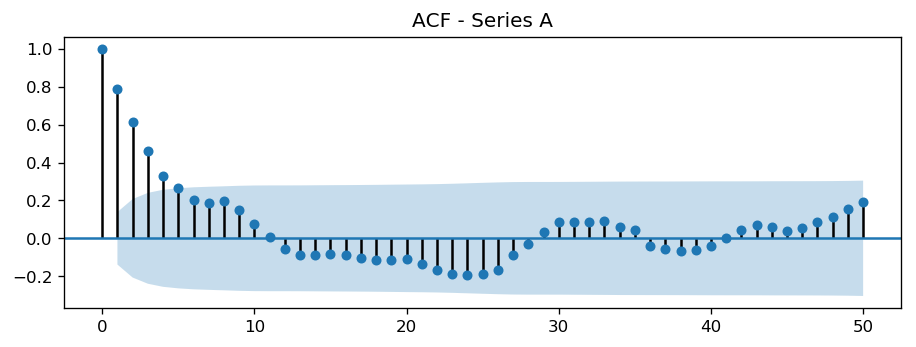

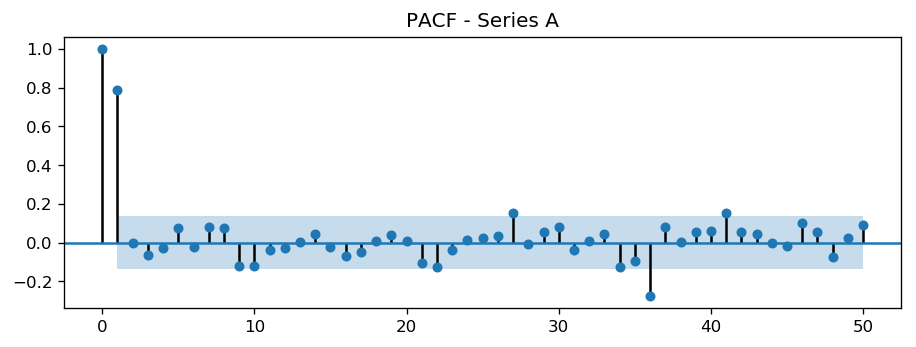

In [4]:
plot_acf(df.A.dropna(), lags = 50)
plt.title('ACF - Series A')
plot_pacf(df.A.dropna(), lags = 50)
plt.title('PACF - Series A')
plt.show()

In [5]:
def auto_ARMA(data, max_p, max_q):
    aic_storage = np.zeros((max_p+1, max_q+1))
    
    for p in range(max_p + 1):
        for q in range(max_q + 1):
            try:
                model = ARIMA(data.dropna(), order=(p, 0, q))
                model_fit = model.fit(disp = 0)
                model_aic = ARMAResults.aic(model_fit)

                print('ARMA(',p,', ',q,') | AIC = ',model_aic)
                aic_storage[p, q] = model_aic
            except:
                pass
            
    final_p = np.where(aic_storage == np.min(aic_storage))[0][0]
    final_q = np.where(aic_storage == np.min(aic_storage))[1][0]
    
    final_model = ARIMA(data.dropna(), order=(final_p, 0, final_q))
    final_model_fit = final_model.fit(disp = 0)
    print('\n')
    print(final_model_fit.summary())

In [6]:
auto_ARMA(df.A, 3, 3)

ARMA( 0 ,  0 ) | AIC =  787.0862391985246
ARMA( 0 ,  1 ) | AIC =  672.7996198092127
ARMA( 0 ,  2 ) | AIC =  633.5434676244204
ARMA( 0 ,  3 ) | AIC =  612.2758453798583
ARMA( 1 ,  0 ) | AIC =  596.4536268843055
ARMA( 1 ,  1 ) | AIC =  598.4536222749906
ARMA( 1 ,  2 ) | AIC =  599.7053157799575
ARMA( 1 ,  3 ) | AIC =  601.5244831994181
ARMA( 2 ,  0 ) | AIC =  598.453621608583
ARMA( 2 ,  1 ) | AIC =  598.3836320510085
ARMA( 2 ,  2 ) | AIC =  601.6443337097926
ARMA( 2 ,  3 ) | AIC =  603.0566300762285
ARMA( 3 ,  0 ) | AIC =  599.8016362578811
ARMA( 3 ,  1 ) | AIC =  601.7646981700532
ARMA( 3 ,  2 ) | AIC =  603.3779657609492
ARMA( 3 ,  3 ) | AIC =  605.3328264217525


                              ARMA Model Results                              
Dep. Variable:                      A   No. Observations:                  200
Model:                     ARMA(1, 0)   Log Likelihood                -295.227
Method:                       css-mle   S.D. of innovations              1.056
Date:      

C:\Users\sergeyz\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [7]:
model = ARIMA(df.A.dropna(), order=(2, 0, 0))
model_fit = model.fit(disp = 0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      A   No. Observations:                  200
Model:                     ARMA(2, 0)   Log Likelihood                -295.227
Method:                       css-mle   S.D. of innovations              1.056
Date:                Sun, 06 Oct 2019   AIC                            598.454
Time:                        18:04:29   BIC                            611.647
Sample:                             0   HQIC                           603.793
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.7820      0.342    -43.258      0.000     -15.452     -14.112
ar.L1.A        0.7854      0.071     11.124      0.000       0.647       0.924
ar.L2.A       -0.0002      0.071     -0.002      0.9

In [8]:
model = ARIMA(df.A.dropna(), order=(1, 0, 0))
model_fit = model.fit(disp = 0)
acorr_ljungbox(ARMAResults.resid(model_fit), lags = [10])

(array([8.40301396]), array([0.58953404]))

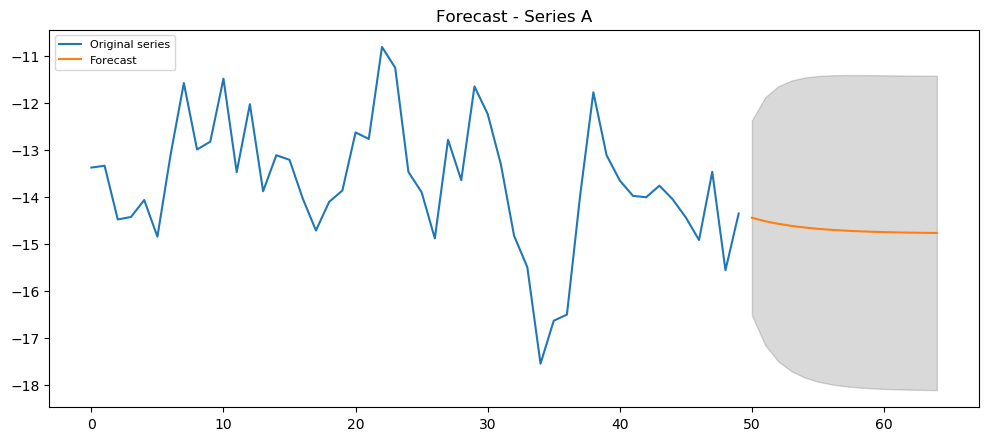

In [15]:
# Forecast
fc, se, conf = model_fit.forecast(15, alpha=0.05)  # 95% conf
fc_index = list(range(50, 65))
# Make as pandas series
fc_series = pd.Series(fc, index=fc_index)
lower_series = pd.Series(conf[:, 0], index=fc_index)
upper_series = pd.Series(conf[:, 1], index=fc_index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(df.A.dropna().values[-50:], label='Original series')
plt.plot(fc_series, label='Forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast - Series A')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Series C

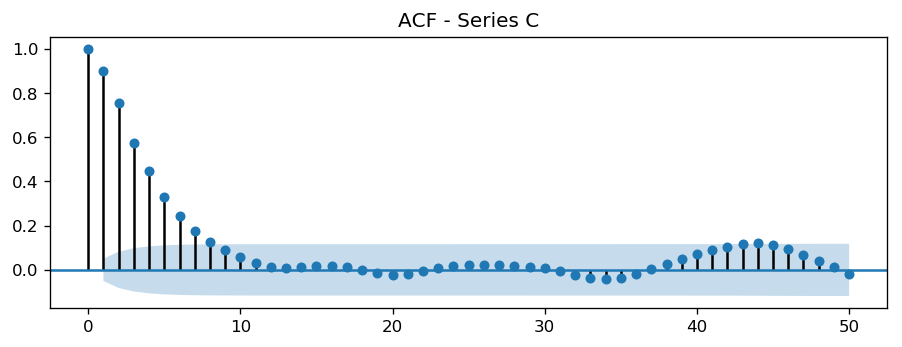

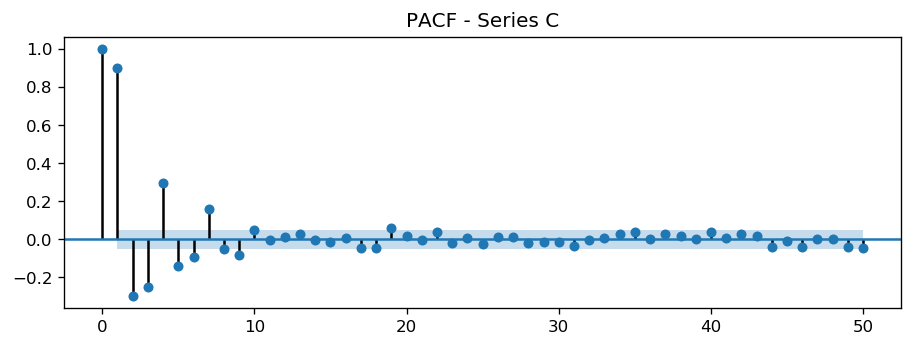

In [16]:
plot_acf(df.C.dropna(), lags = 50)
plt.title('ACF - Series C')
plot_pacf(df.C.dropna(), lags = 50)
plt.title('PACF - Series C')
plt.show()

In [18]:
auto_ARMA(df.C, 9, 2)

ARMA( 0 ,  0 ) | AIC =  10733.947200779456
ARMA( 0 ,  1 ) | AIC =  9524.22510967211
ARMA( 1 ,  0 ) | AIC =  8237.748092588075
ARMA( 1 ,  1 ) | AIC =  8160.265756779968
ARMA( 1 ,  2 ) | AIC =  7826.414275364425
ARMA( 2 ,  0 ) | AIC =  8102.801680303808
ARMA( 2 ,  1 ) | AIC =  8070.21581340038
ARMA( 2 ,  2 ) | AIC =  7788.737972145545
ARMA( 3 ,  0 ) | AIC =  8009.962819700908
ARMA( 3 ,  1 ) | AIC =  7916.1167967013225
ARMA( 3 ,  2 ) | AIC =  7790.542797812503
ARMA( 4 ,  0 ) | AIC =  7878.104450135139
ARMA( 4 ,  1 ) | AIC =  7865.29854686746
ARMA( 4 ,  2 ) | AIC =  7792.429877752232
ARMA( 5 ,  0 ) | AIC =  7851.879168018266
ARMA( 5 ,  1 ) | AIC =  7850.052158834156
ARMA( 5 ,  2 ) | AIC =  7793.141376349475
ARMA( 6 ,  0 ) | AIC =  7842.098635631292
ARMA( 6 ,  1 ) | AIC =  7825.205302484034
ARMA( 6 ,  2 ) | AIC =  7794.599643187566
ARMA( 7 ,  0 ) | AIC =  7807.863140375717
ARMA( 7 ,  1 ) | AIC =  7808.195181295377
ARMA( 7 ,  2 ) | AIC =  7796.59964265839
ARMA( 8 ,  0 ) | AIC =  7806.2822985

ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.

In [19]:
model = ARIMA(df.C.dropna(), order=(2, 0, 2))
model_fit = model.fit(disp = 0)
print(model_fit.summary())
acorr_ljungbox(ARMAResults.resid(model_fit), lags = [10])

                              ARMA Model Results                              
Dep. Variable:                      C   No. Observations:                 1500
Model:                     ARMA(2, 2)   Log Likelihood               -3888.369
Method:                       css-mle   S.D. of innovations              3.230
Date:                Sun, 06 Oct 2019   AIC                           7788.738
Time:                        18:08:21   BIC                           7820.617
Sample:                             0   HQIC                          7800.614
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.5792      0.696     15.199      0.000       9.215      11.943
ar.L1.C        0.4431      0.041     10.742      0.000       0.362       0.524
ar.L2.C        0.2708      0.040      6.792      0.0

(array([3.40842878]), array([0.9701165]))

In [21]:
model = ARIMA(df.C.dropna(), order=(2, 0, 2))
model_fit = model.fit(disp = 0)
acorr_ljungbox(ARMAResults.resid(model_fit), lags = [10])

(array([3.40842878]), array([0.9701165]))

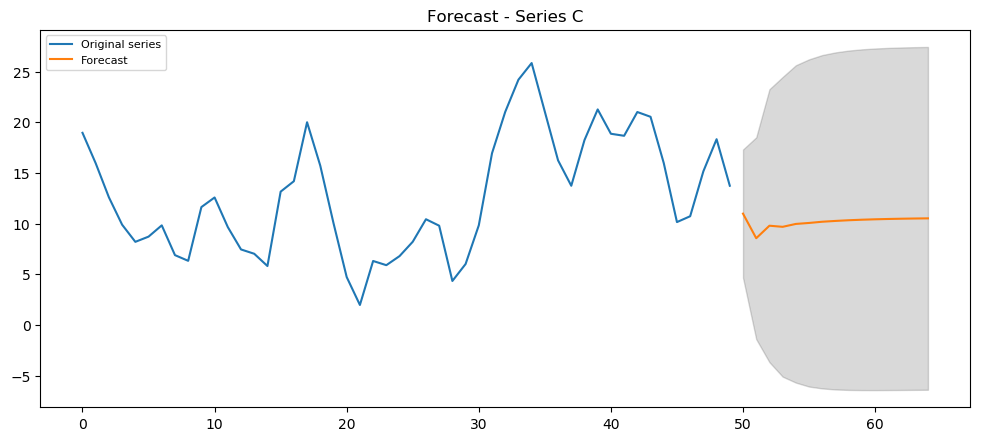

In [23]:
# Forecast
fc, se, conf = model_fit.forecast(15, alpha=0.05)  # 95% conf
fc_index = list(range(50, 65))
# Make as pandas series
fc_series = pd.Series(fc, index=fc_index)
lower_series = pd.Series(conf[:, 0], index=fc_index)
upper_series = pd.Series(conf[:, 1], index=fc_index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(df.C.dropna().values[-50:], label='Original series')
plt.plot(fc_series, label='Forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast - Series C')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Series E

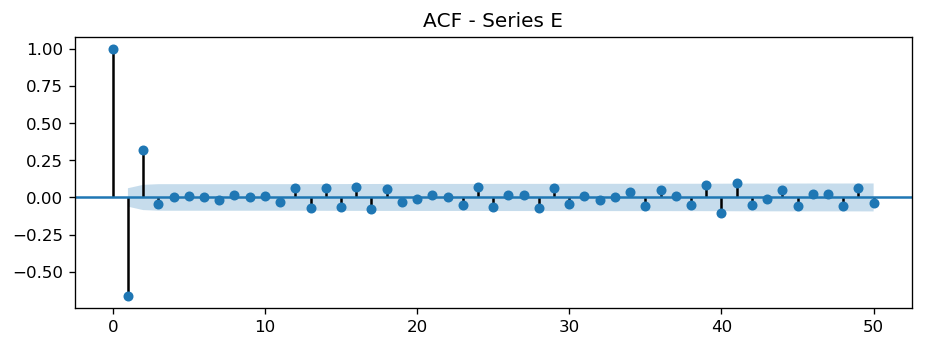

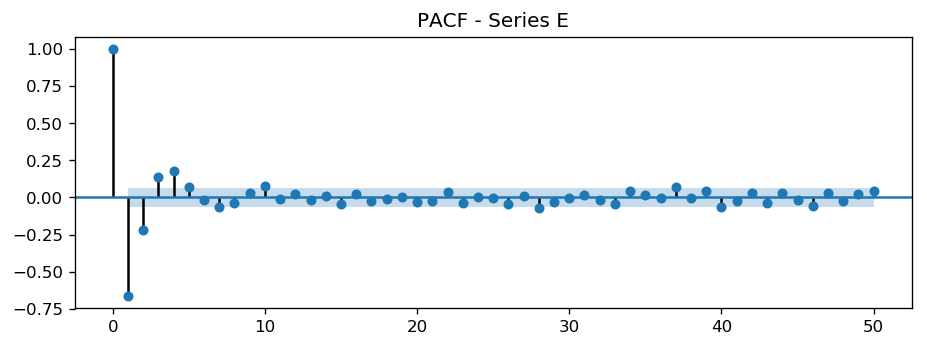

In [24]:
plot_acf(df.E.dropna(), lags = 50)
plt.title('ACF - Series E')
plot_pacf(df.E.dropna(), lags = 50)
plt.title('PACF - Series E')
plt.show()

In [25]:
auto_ARMA(df.E, 5, 5)

ARMA( 0 ,  0 ) | AIC =  5133.806491928286
ARMA( 0 ,  1 ) | AIC =  4698.245254152634
ARMA( 0 ,  3 ) | AIC =  4449.846310324665
ARMA( 0 ,  4 ) | AIC =  4451.732901329263
ARMA( 0 ,  5 ) | AIC =  4453.326973746703
ARMA( 1 ,  0 ) | AIC =  4556.606047176867
ARMA( 1 ,  1 ) | AIC =  4528.043330710389
ARMA( 1 ,  2 ) | AIC =  4449.737480425532
ARMA( 1 ,  3 ) | AIC =  4451.652629015982


C:\Users\sergeyz\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:649: RuntimeWarning: divide by zero encountered in true_divide
  R_mat, T_mat)
C:\Users\sergeyz\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:607: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
C:\Users\sergeyz\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:609: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()


ARMA( 1 ,  5 ) | AIC =  4452.5054318234925
ARMA( 2 ,  0 ) | AIC =  4510.572601109345
ARMA( 2 ,  1 ) | AIC =  4505.150693535894
ARMA( 2 ,  2 ) | AIC =  4451.676247606856
ARMA( 2 ,  3 ) | AIC =  4450.495560140018
ARMA( 2 ,  4 ) | AIC =  4448.25697475741
ARMA( 2 ,  5 ) | AIC =  4451.322067758614
ARMA( 3 ,  0 ) | AIC =  4493.945937945564
ARMA( 3 ,  1 ) | AIC =  4472.589272399088
ARMA( 3 ,  2 ) | AIC =  4453.45800117069


C:\Users\sergeyz\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARMA( 3 ,  3 ) | AIC =  4452.485627252345
ARMA( 3 ,  4 ) | AIC =  4453.027990048542
ARMA( 3 ,  5 ) | AIC =  4448.527845490305
ARMA( 4 ,  0 ) | AIC =  4464.421337062233
ARMA( 4 ,  1 ) | AIC =  4463.21119191361
ARMA( 4 ,  2 ) | AIC =  4454.741474293184


C:\Users\sergeyz\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


ARMA( 4 ,  3 ) | AIC =  4458.213414988235
ARMA( 4 ,  4 ) | AIC =  4456.332750973828
ARMA( 4 ,  5 ) | AIC =  4445.893041563292
ARMA( 5 ,  0 ) | AIC =  4461.763605209599
ARMA( 5 ,  1 ) | AIC =  4463.672829633865
ARMA( 5 ,  2 ) | AIC =  4456.602476727808


C:\Users\sergeyz\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


ARMA( 5 ,  4 ) | AIC =  4451.466254928857
ARMA( 5 ,  5 ) | AIC =  4462.482746090609


C:\Users\sergeyz\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.

In [37]:
model = ARIMA(df.E.dropna(), order=(3, 0, 5))
model_fit = model.fit(disp = 0)
print(model_fit.summary())
acorr_ljungbox(ARMAResults.resid(model_fit), lags = [10])

                              ARMA Model Results                              
Dep. Variable:                      E   No. Observations:                 1000
Model:                     ARMA(3, 5)   Log Likelihood               -2214.264
Method:                       css-mle   S.D. of innovations              2.209
Date:                Sun, 06 Oct 2019   AIC                           4448.528
Time:                        18:20:35   BIC                           4497.605
Sample:                             0   HQIC                          4467.181
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.9794      0.051    117.227      0.000       5.879       6.079
ar.L1.E       -1.8692      0.004   -519.471      0.000      -1.876      -1.862
ar.L2.E       -1.8594      0.004   -485.738      0.0

(array([3.71926338]), array([0.95912414]))

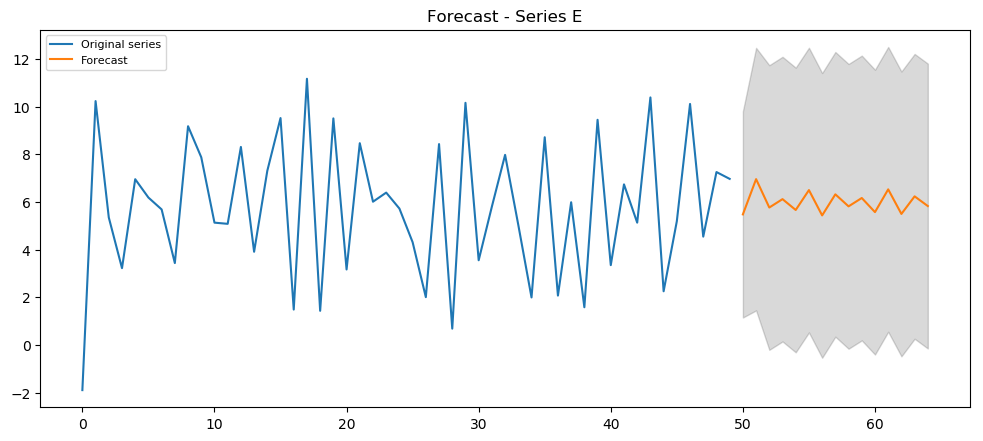

In [38]:
# Forecast
fc, se, conf = model_fit.forecast(15, alpha=0.05)  # 95% conf
fc_index = list(range(50, 65))
# Make as pandas series
fc_series = pd.Series(fc, index=fc_index)
lower_series = pd.Series(conf[:, 0], index=fc_index)
upper_series = pd.Series(conf[:, 1], index=fc_index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(df.E.dropna().values[-50:], label='Original series')
plt.plot(fc_series, label='Forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast - Series E')
plt.legend(loc='upper left', fontsize=8)
plt.show()